<a href="https://colab.research.google.com/github/giriprasath1012/PRODIGY_DS_02/blob/main/DS_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [3]:
t_data=pd.read_csv("/content/drive/MyDrive/train.csv")
t_data.shape

(891, 12)

Data Cleaning and Data Preprocessing

In [4]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Drop the 'Cabin' column due to a large number of missing values

In [5]:
t_data.drop('Cabin',axis=1,inplace=True)
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Fill missing values in the 'Embarked' column with the mode

In [6]:
t_data['Embarked'].fillna(t_data['Embarked'].mode()[0],inplace=True)
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Fill missing values in the 'Age' column with the mean

In [7]:
t_data['Age'].fillna(t_data['Age'].mean(),inplace=True)
t_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Exploratory Data Analysis (EDA)

Countplot of Survived

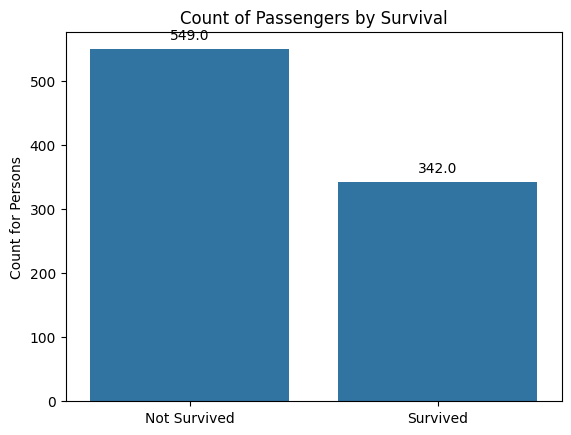

In [8]:
ax=sns.countplot(x='Survived',data=t_data)
plt.title('Count of Passengers by Survival')
label=['Not Survived','Survived']
plt.xlabel("")
plt.ylabel("Count for Persons")
plt.xticks(ticks=[0,1],labels=label)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Countplot of Survived with Hue of Pclass

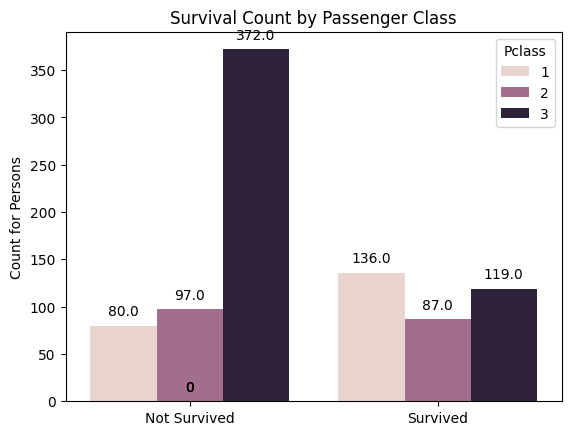

In [9]:
ax=sns.countplot(x='Survived', hue='Pclass', data=t_data)
plt.title('Survival Count by Passenger Class')
label=['Not Survived','Survived']
plt.xlabel("")
plt.ylabel("Count for Persons")
plt.xticks(ticks=[0,1],labels=label)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Countplot of Survived with Hue of Gender

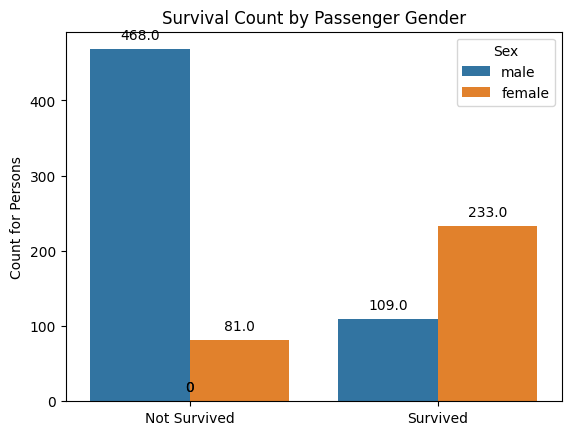

In [10]:
ax=sns.countplot(x='Survived', hue='Sex', data=t_data)
plt.title('Survival Count by Passenger Gender')
label=['Not Survived','Survived']
plt.xlabel("")
plt.ylabel("Count for Persons")
plt.xticks(ticks=[0,1],labels=label)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

 Distribution of Age

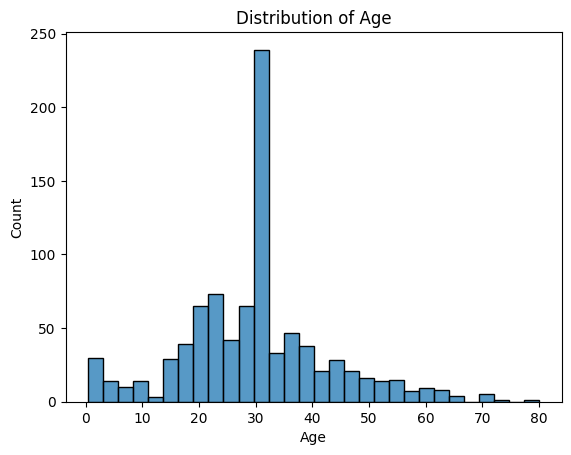

In [11]:
sns.histplot(t_data['Age'].dropna(), kde=False, bins=30)
plt.title('Distribution of Age')
plt.show()

Correlation heatmap

<ipython-input-12-11162d453bbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = t_data.corr()


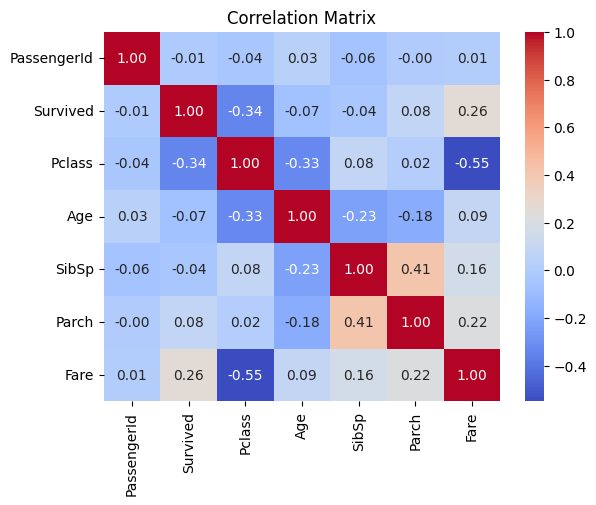

In [12]:
correlation_matrix = t_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()